# Decision Tree and Support Vector Machine Classification of Dry Bean Varieties

## 1.0 Business understanding

### 1.1 Business objective

### 1.2 Situational assessment

* Computer vision system designed to obtain uniform seed classification.
* Seven different registered varieties of dry beans.
* Segmentation and feature extraction of 16 features; 12 dimensions and 4 shape forms
* Develop classification models for dry bean varieties from using extracted features.

**Research Question #1:**

Can dry bean varieties be classified from features extracted from computer vision images?

**Hypothesis Couplet**

Null Hypothesis (H<sub>0</sub>): Dry bean varieties cannot be classified from the features extracted from computer vision images?


Alternate Hypothesis (H<sub>1</sub>): Dry bean varieties can be classified from the features extracted from computer vision images?


## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Data mining goals

#### 2.1.2 Import libraries

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import itertools
import graphviz
import warnings

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import silhouette_score as ss
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mlxtend.plotting import plot_decision_regions
from google.colab import files
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.calibration import CalibratedClassifierCV

#### 2.1.3 Suppress warnings

In [3]:
warnings.filterwarnings('ignore')

#### 2.1.4 Data ingestion

In [4]:
# Import dataset
#create 2-dimensional dataFrames from a imported data.
#Choose the local file (baseball.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.csv to Dry_Bean_Dataset.csv


In [5]:
file_name = "Dry_Bean_Dataset.csv"

In [6]:
# Load dataset
df=pd.read_csv(file_name)
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


#### 2.1.5 Data description

**High Level Data Dictionary**

* Area (A): The area of a bean zone and the number of pixels within its boundaries.
* Perimeter (P): Bean circumference is defined as the length of its border.
* Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
* Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* Aspect ratio (K): Defines the relationship between L and l.
* Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
* Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
* Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
* Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* Roundness (R): Calculated with the following formula: (4piA)/(P^2)
* Compactness (CO): Measures the roundness of an object: Ed/L
* ShapeFactor1 (SF1): L/A
* ShapeFactor2 (SF2): l/A
* ShapeFactor3 (SF3): A/((L/2)*(L/2)*pi)
* ShapeFactor4 (SF4): A/((L/2)*(Ll2)*pi)
* Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
df.describe(include='object')

,Class
count,13611
unique,7
top,DERMASON
freq,3546


### 2.2 Data quality

#### 2.2.1 Check for missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

There are no missing values.

#### 2.2.2 Check for outliers

In [10]:
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [11]:
feature_df = df.drop('Class', axis=1)

In [12]:
rows, cols = 4, 4
num_columns = len(feature_df.columns)
num_plots = min(rows * cols, num_columns)

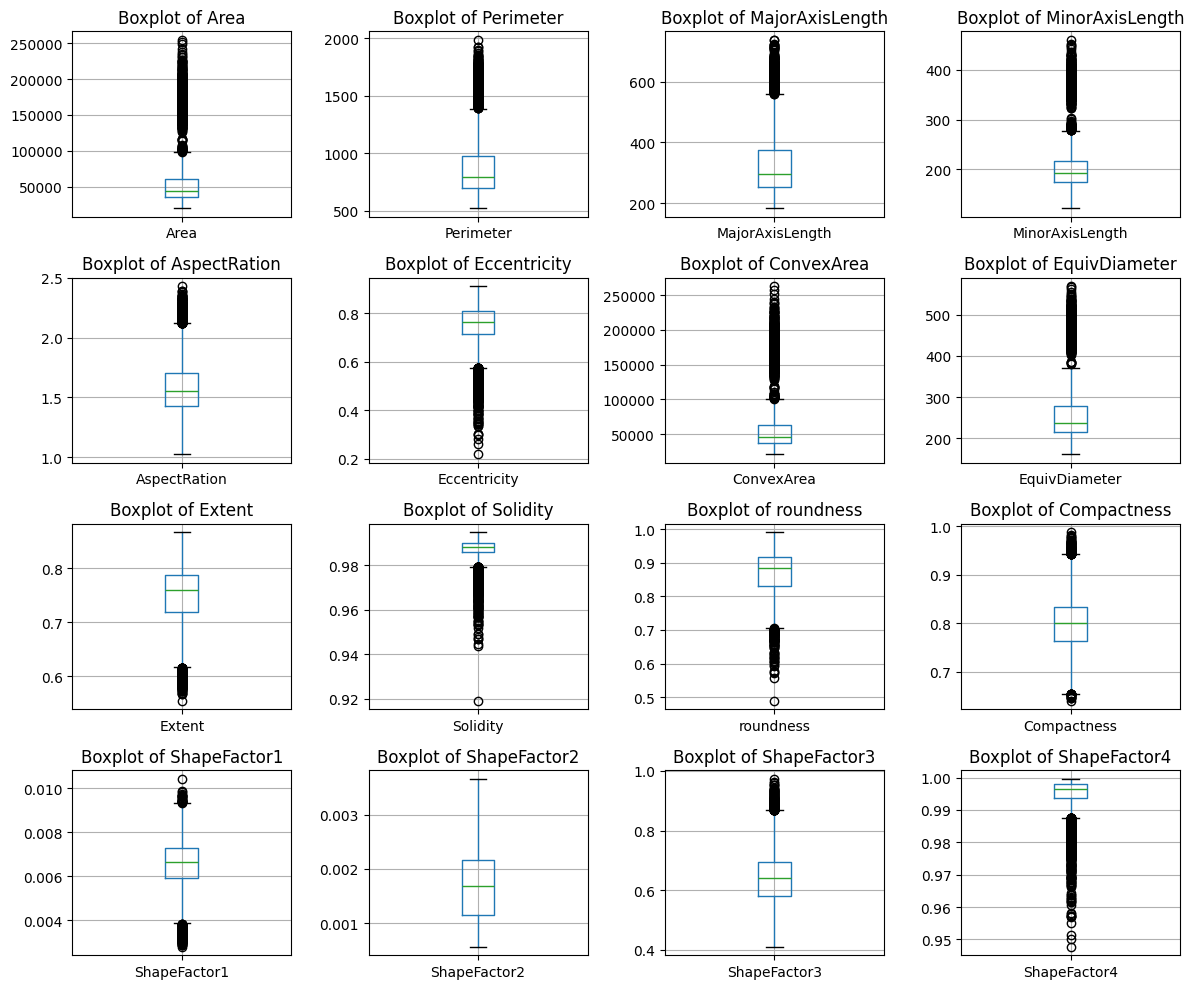

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

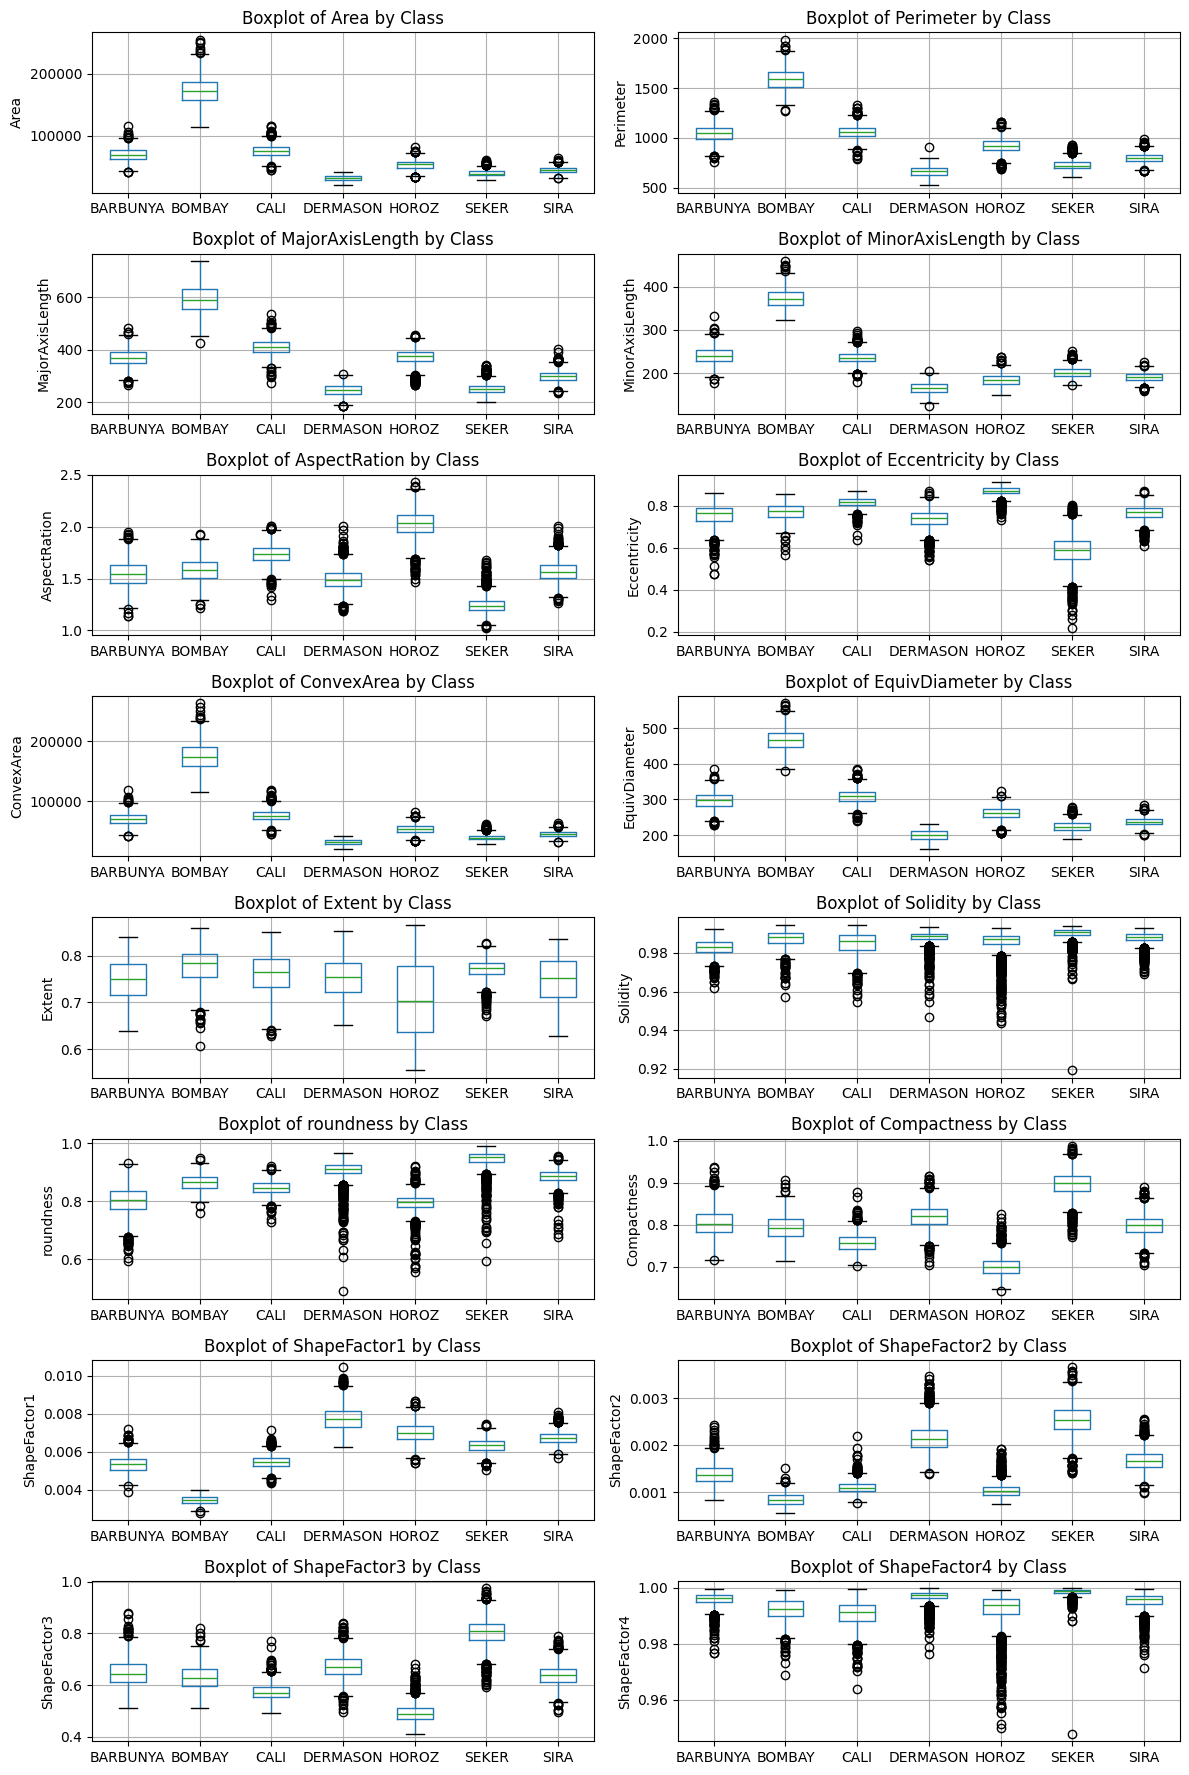

In [14]:
rows, cols = 8, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 18))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    df.boxplot(column=column, by='Class', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Class')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

fig.suptitle('')
plt.tight_layout()
plt.show()

All the numeric features have outliers except for ShapeFactor2.

#### 2.2.3 Check for duplicates

In [15]:
df.duplicated().sum()

np.int64(68)

There are 68 duplicate rows.

### 2.3 Exploratory data analysis

#### 2.3.1 Check distributions of numeric variables

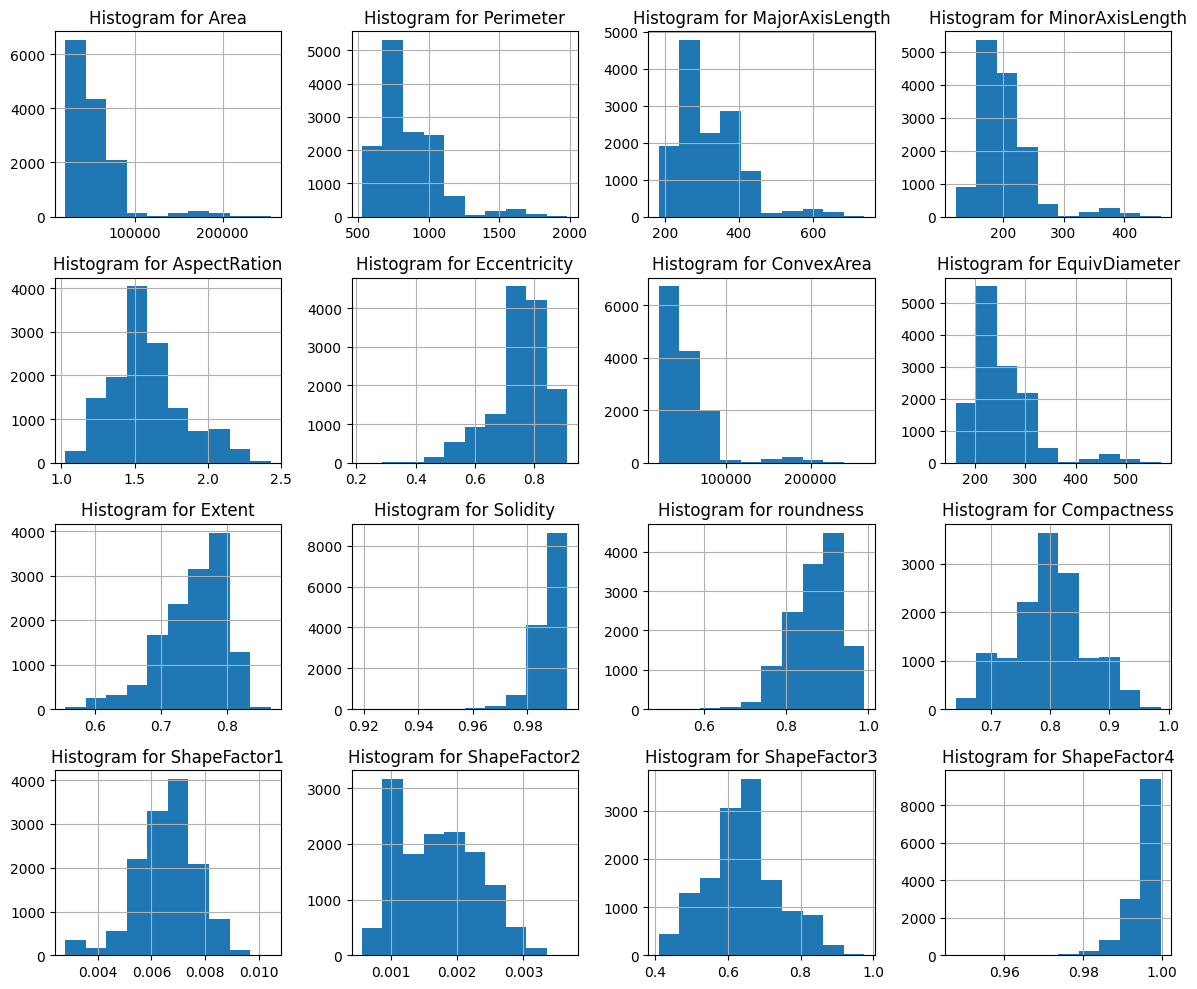

In [16]:
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.hist(column=column, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The data is bimodal and skewed to the right.

#### 2.3.2 Check density of numeric variables

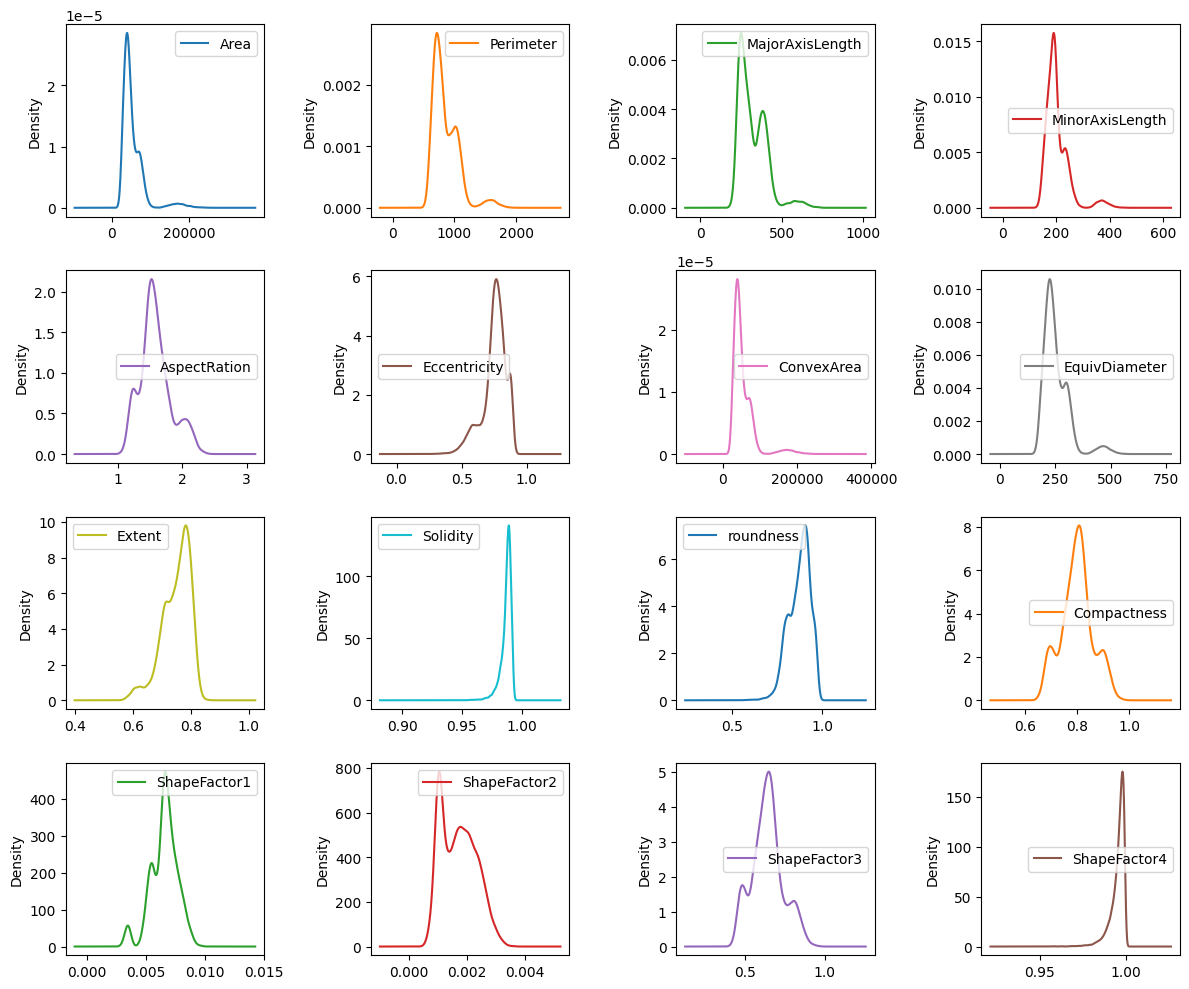

In [17]:
feature_df.plot(kind='density', subplots=True, layout=(4,4), figsize=(12,10), sharex=False)

plt.tight_layout()
plt.show()

#### 2.3.3 Check corrleations of numeric variables

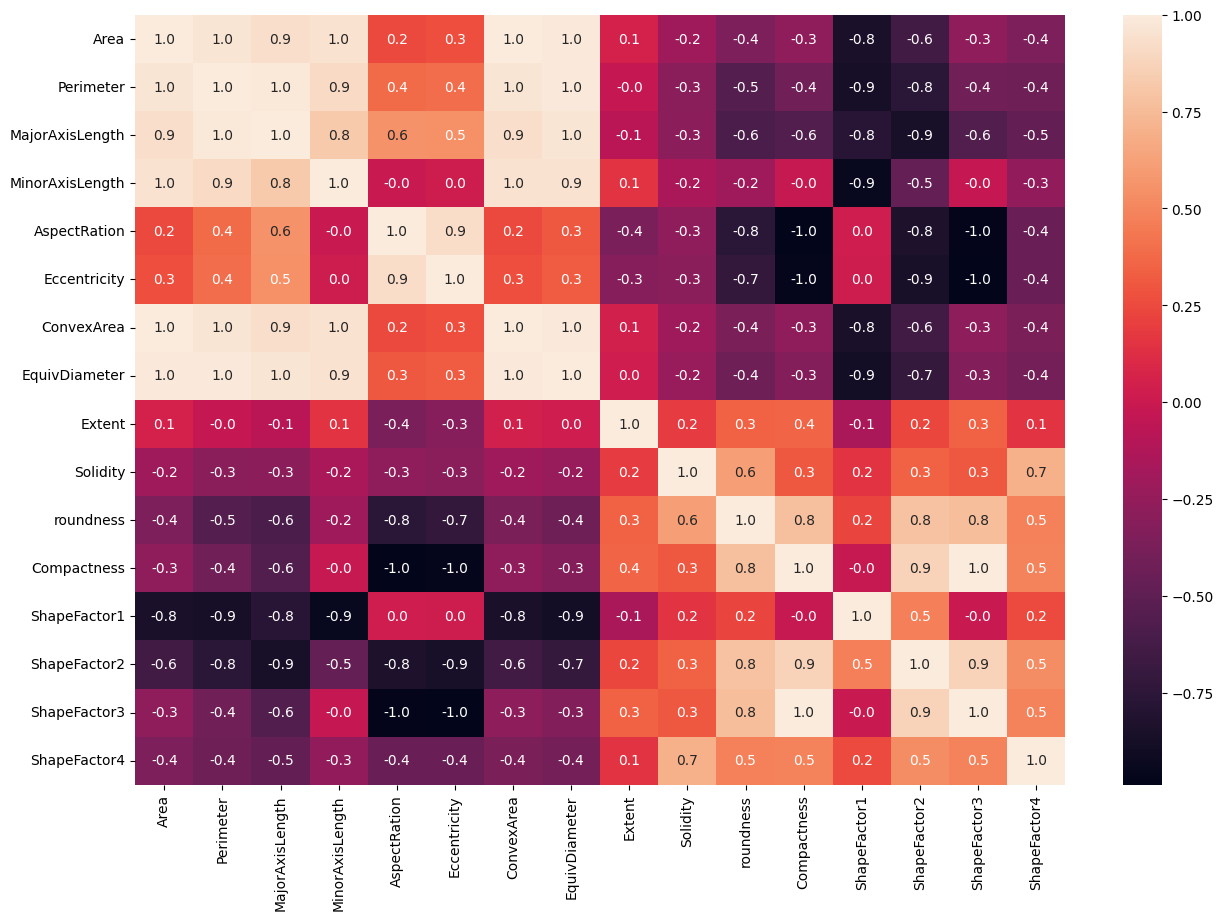

In [18]:
plt.figure(figsize=[15,10],facecolor='white')
sns.heatmap(feature_df.corr(), annot=True, fmt=".1f")
plt.show()

There are strong correlations between many of the features.

#### 2.3.4 Observations by class

In [19]:
print(df['Class'].value_counts())

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


## 3.0 Data preprocessing

### 3.1 Data cleansing

#### 3.1.1 No missing values

#### 3.1.2 Remove duplicate rows.

In [20]:
df = df.drop_duplicates()
df.shape

(13543, 17)

#### 3.1.3 Remove outliers

In [21]:
Q1 = feature_df.quantile(0.25)
Q3 = feature_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
df_filtered = df.copy()

for col in feature_df.columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

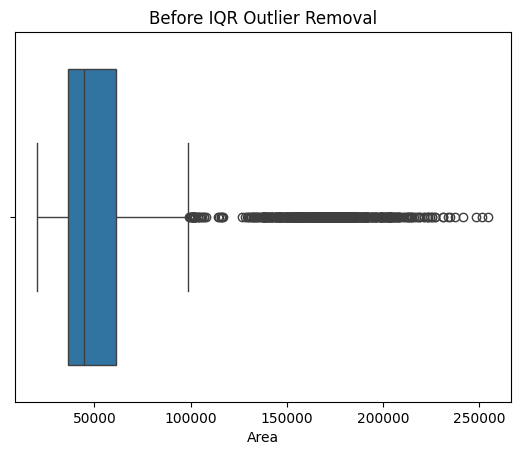

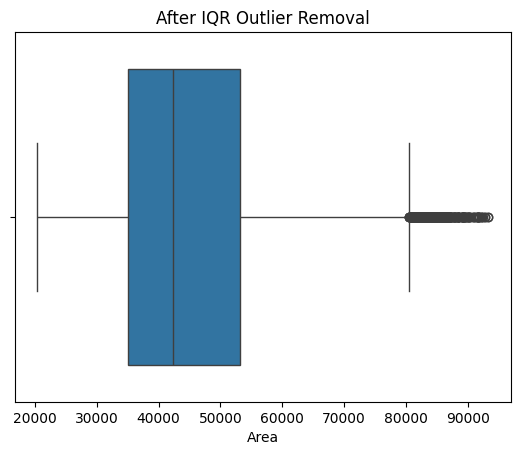

In [23]:
sns.boxplot(x=df["Area"])
plt.title("Before IQR Outlier Removal")
plt.show()

sns.boxplot(x=df_filtered["Area"])
plt.title("After IQR Outlier Removal")
plt.show()

In [24]:
df_filtered.shape

(10261, 17)

#### 3.1.4 Drop highly correlated features

In [25]:
data = df_filtered.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'Class'], axis=1)

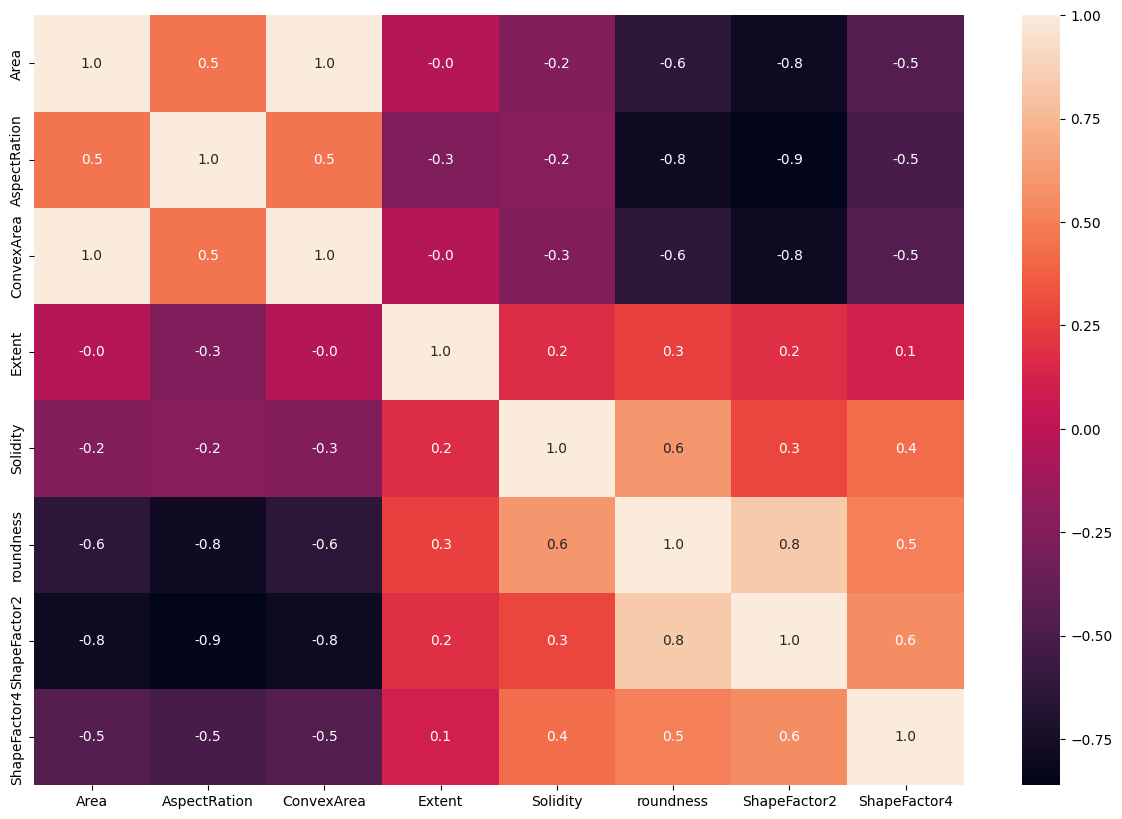

In [26]:
plt.figure(figsize=[15,10],facecolor='white')
sns.heatmap(data.corr(), annot=True, fmt=".1f")
plt.show()

### 3.2 Feature engineering

### 3.3 Data partitioning

In [27]:
X = data
y = df_filtered['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_train)

In [30]:
color_values, class_names = pd.factorize(y_train)

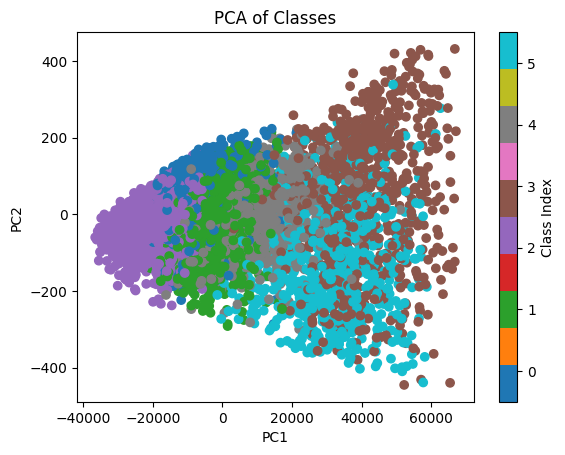

In [31]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=color_values, cmap="tab10")
plt.title("PCA of Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(ticks=range(len(class_names)), label="Class Index")
plt.clim(-0.5, len(class_names) - 0.5)
plt.show()

### 3.4 Data transformation

#### 3.4.1 Scale numeric variables

In [32]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min()) * 9 + 1

In [33]:
X_train.describe()

,Area,AspectRation,ConvexArea,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
count,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,4.170237,4.433134,4.176423,5.949028,6.429450,6.298005,4.483703,6.923429
std,1.887557,1.977797,1.897448,1.569031,1.697341,1.838068,1.798464,2.025995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.787521,3.183830,2.785893,4.811095,5.504453,5.169904,2.957682,5.782394
50%,3.699728,4.166052,3.701235,6.171440,6.706431,6.628228,4.535003,7.442992
75%,5.051599,5.382522,5.061300,7.202942,7.612675,7.611869,5.881497,8.495339
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


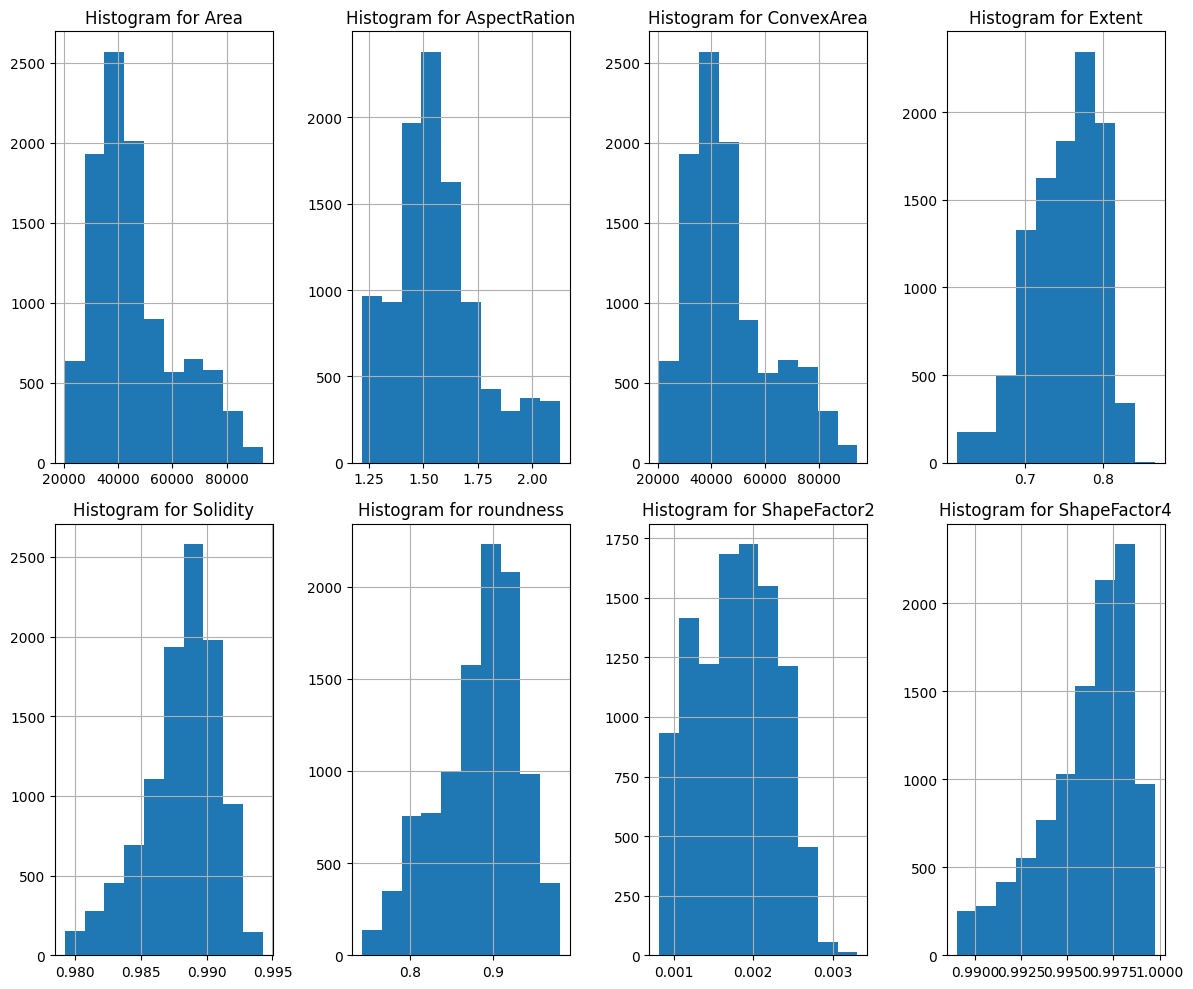

In [34]:
rows, cols = 2, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(data.columns[:rows * cols]):
    data.hist(column=column, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [35]:
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min()) * 9 + 1

In [36]:
X_test.describe()

,Area,AspectRation,ConvexArea,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,4.236046,4.435383,4.203712,6.432908,6.342831,6.256978,4.387069,6.970580
std,1.922278,1.992701,1.909976,1.740495,1.668126,1.881225,1.838587,1.992719
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.885502,3.194070,2.856791,5.181054,5.515711,5.054197,2.890437,5.819145
50%,3.753942,4.118168,3.717575,6.675313,6.594087,6.615736,4.434692,7.492828
75%,5.094707,5.419768,5.060498,7.828502,7.500969,7.627479,5.834664,8.511890
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


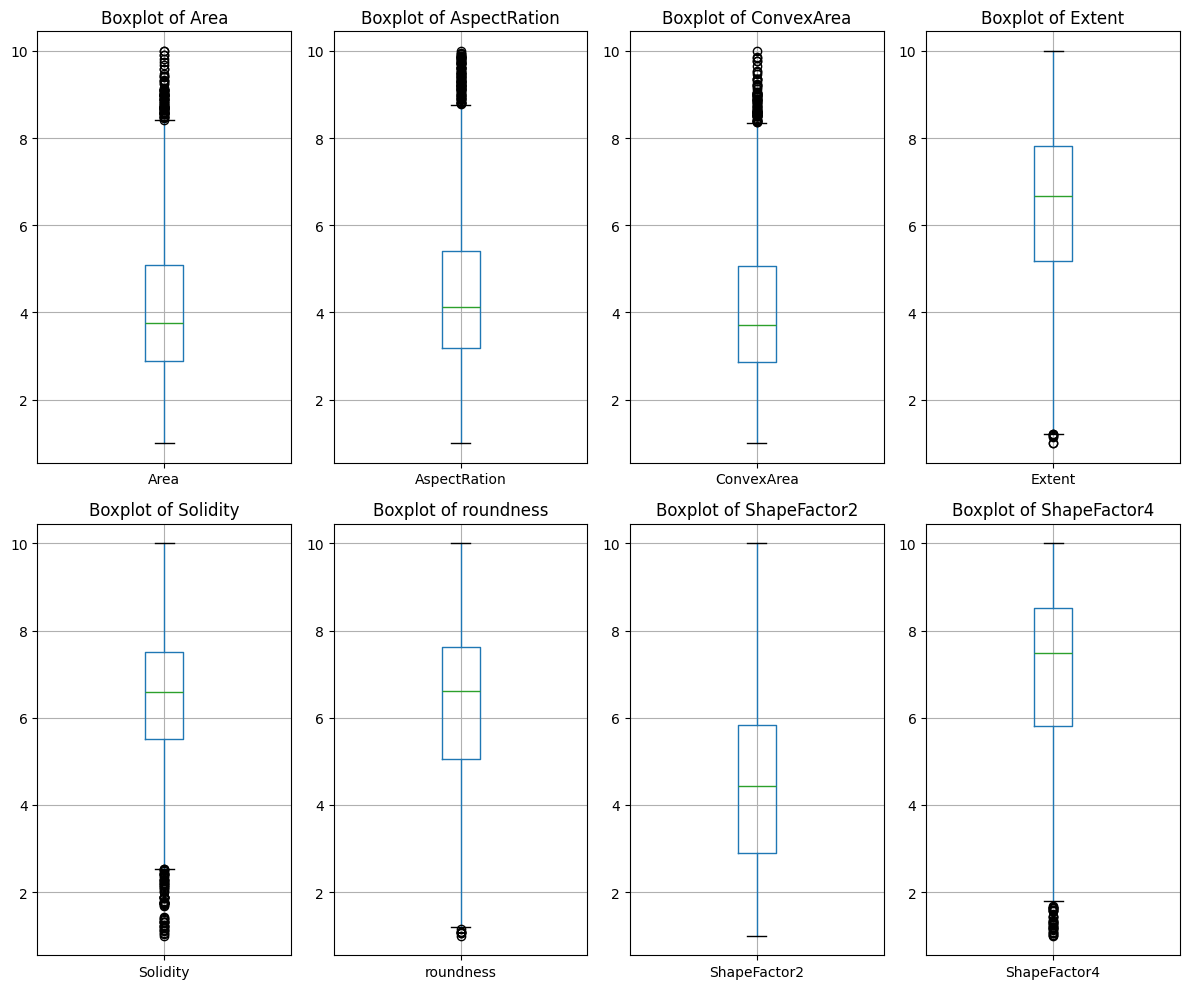

In [37]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(X_test.columns[:rows * cols]):
    X_test.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 3.4.2 Grid search SVM parameters

In [38]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [39]:
grid = RandomizedSearchCV(SVC(), param_grid, cv=5, random_state=42)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}


#### 3.4.2 Grid search decision tree parameters

In [40]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

In [41]:
clf = DecisionTreeClassifier(random_state=42)
grid = RandomizedSearchCV(clf, param_grid, cv=5, scoring='accuracy', random_state=42)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy', 'ccp_alpha': 0.0}


## 4.0 Modeling

### 4.1 SVM classifier

#### 4.1.1 Initial SVM classifier

In [42]:
svm_model1 = SVC(kernel='rbf', C = 0.1, random_state=42)
svm_model1.fit(X_train, y_train)
svm_pred1 = svm_model1.predict(X_test)

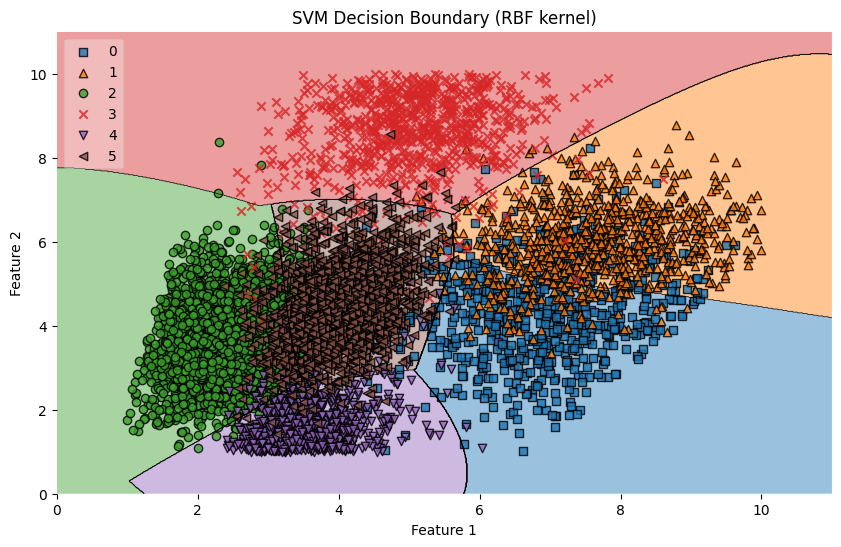

In [43]:
X_vis = X_train.iloc[:, :2].values
y_vis = y_train.values

le = LabelEncoder()
y_vis_enc = le.fit_transform(y_vis)

svm_vis = SVC(kernel='rbf', C=0.1, random_state=42)
svm_vis.fit(X_vis, y_vis_enc)

plt.figure(figsize=(10,6))
plot_decision_regions(X=X_vis, y=y_vis_enc, clf=svm_vis, legend=2)
plt.title('SVM Decision Boundary (RBF kernel)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [44]:
for i, label in enumerate(le.classes_):
    print(f"Class {i}: {label}")

Class 0: BARBUNYA
Class 1: CALI
Class 2: DERMASON
Class 3: HOROZ
Class 4: SEKER
Class 5: SIRA


#### 4.1.2 Optimized SVM classifier

In [45]:
svm_model2 = SVC(kernel='poly', gamma='auto', C=10, random_state=42)
svm_model2.fit(X_train, y_train)
svm_pred2 = svm_model2.predict(X_test)

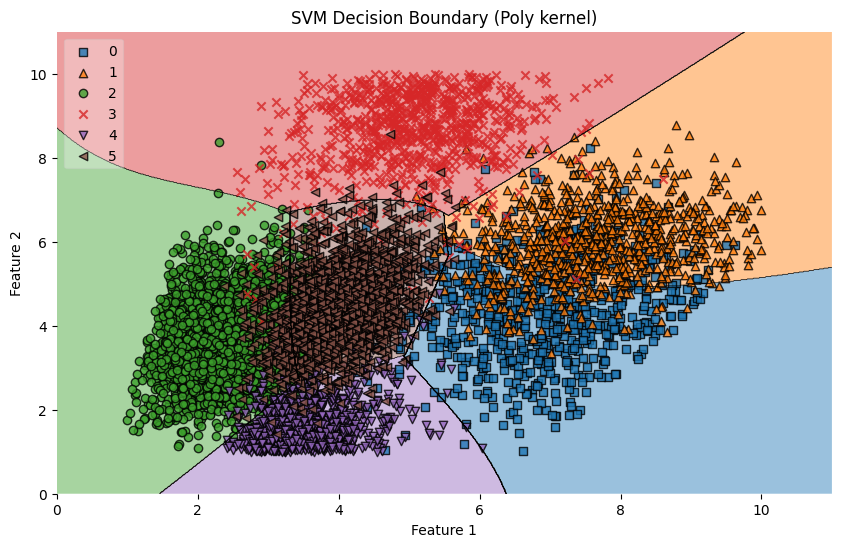

In [46]:
X_vis = X_train.iloc[:, :2].values
y_vis = y_train.values

le = LabelEncoder()
y_vis_enc = le.fit_transform(y_vis)

svm_vis = SVC(kernel='poly', gamma='auto', C=10, random_state=42)
svm_vis.fit(X_vis, y_vis_enc)

plt.figure(figsize=(10,6))
plot_decision_regions(X=X_vis, y=y_vis_enc, clf=svm_vis, legend=2)
plt.title('SVM Decision Boundary (Poly kernel)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [47]:
for i, label in enumerate(le.classes_):
    print(f"Class {i}: {label}")

Class 0: BARBUNYA
Class 1: CALI
Class 2: DERMASON
Class 3: HOROZ
Class 4: SEKER
Class 5: SIRA


### 4.2 Decision tree classifier

In [48]:
def plot_decision_tree(X_train, tree_model):
  plt.figure(figsize=(20,10))
  plot_tree(tree_model,
            feature_names=X_train.columns,
            class_names=tree_model.classes_.astype(str),
            filled=True,
            rounded=True)
  plt.title("Decision Tree Visualization")
  plt.show()

#### 4.2.1 Initial decision tree classifier

In [49]:
tree_model1 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model1.fit(X_train, y_train)
tree_pred1 = tree_model1.predict(X_test)

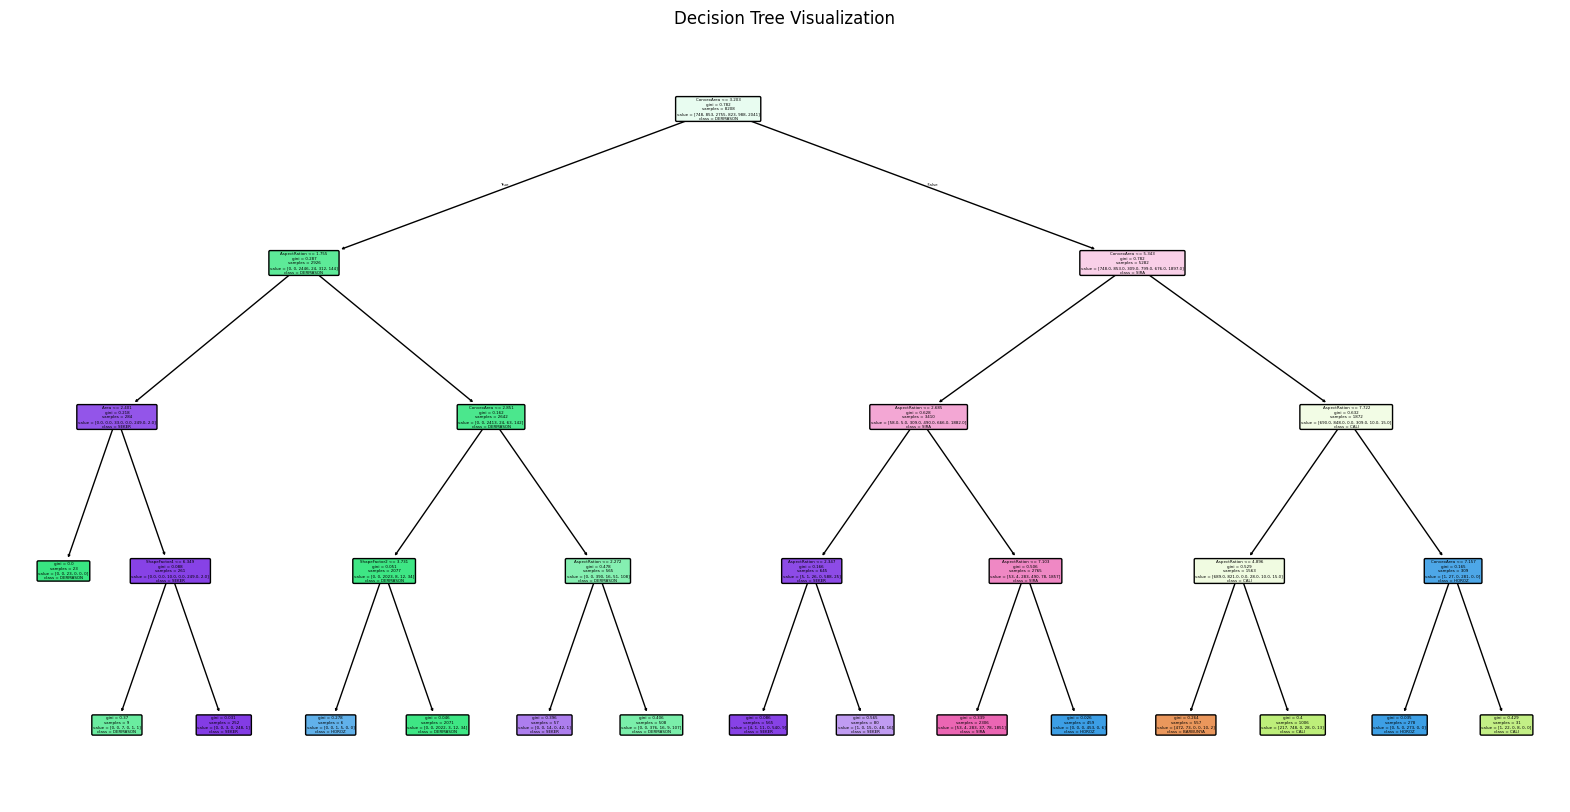

In [50]:
plot_decision_tree(X_train, tree_model1)

In [51]:
dot_data = export_graphviz(tree_model1, out_file=None,
                           feature_names=X_train.columns,
                           class_names=tree_model1.classes_.astype(str),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_visualization1", format="png", cleanup=True)
graph.view()

'tree_visualization1.pdf'

In [52]:
files.download("tree_visualization1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 4.2.2 Optimized decision tree classifier

In [53]:
tree_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_split = 10, min_samples_leaf = 2, ccp_alpha = 0.0, random_state=42)
tree_model2.fit(X_train, y_train)
tree_pred2 = tree_model2.predict(X_test)

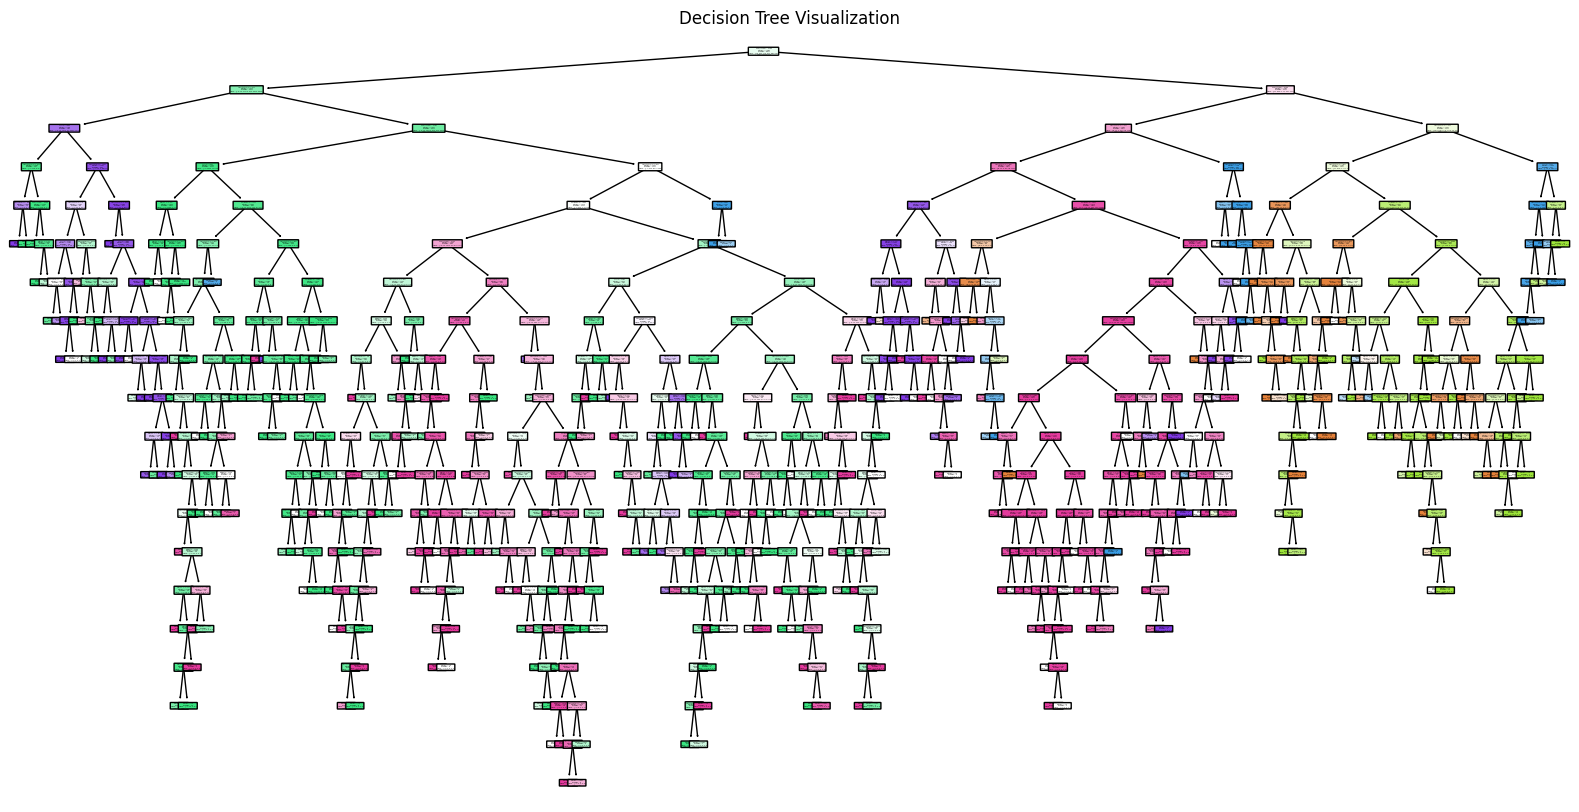

In [54]:
plot_decision_tree(X_train, tree_model2)

In [55]:
dot_data = export_graphviz(tree_model2, out_file=None,
                           feature_names=X_train.columns,
                           class_names=tree_model2.classes_.astype(str),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_visualization2", format="png", cleanup=True)
graph.view()

'tree_visualization2.pdf'

In [56]:
files.download("tree_visualization2.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5.0 Evaluation

In [57]:
classes = sorted(y.unique())
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

### 5.1 SVM evaluation

#### 5.1.1 Initial SVM model evaluation

In [58]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred1))

SVM Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       187
        CALI       0.93      0.93      0.93       214
    DERMASON       0.94      0.89      0.92       689
       HOROZ       0.93      0.92      0.92       206
       SEKER       0.94      0.94      0.94       247
        SIRA       0.83      0.90      0.86       510

    accuracy                           0.91      2053
   macro avg       0.92      0.91      0.92      2053
weighted avg       0.91      0.91      0.91      2053



In [59]:
class_labels = sorted(np.unique(y_test))

In [60]:
def plot_confusion_matrix(conf_matrix, class_labels):
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_labels,
              yticklabels=class_labels,
              linewidths=0.5, linecolor='gray',
              cbar_kws={'label': 'Number of Instances'})

  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.tight_layout()
  plt.show()

In [61]:
conf_matrix = confusion_matrix(y_test, svm_pred1)

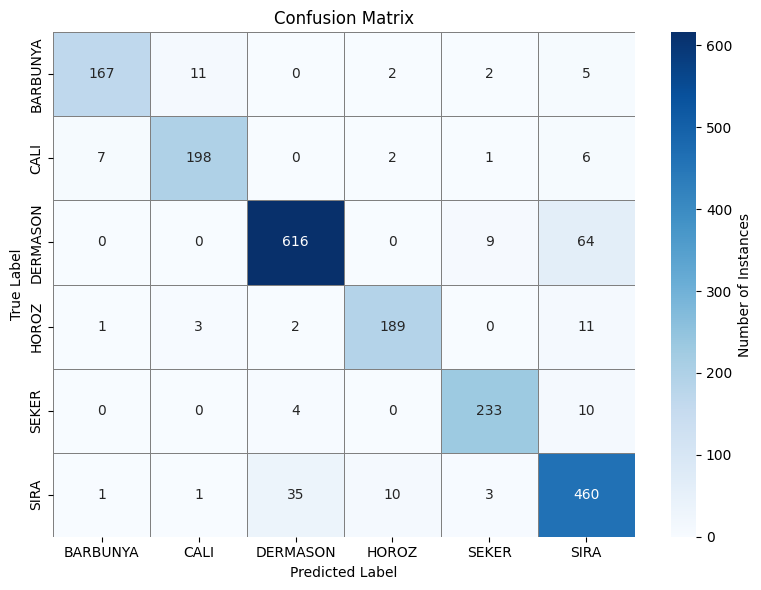

In [62]:
plot_confusion_matrix(conf_matrix, class_labels)

In [63]:
ovr_svm1 = OneVsRestClassifier(svm_model1)
ovr_svm1.fit(X_train, y_train_bin)

OneVsRestClassifier(estimator=SVC(C=0.1, random_state=42))

In [64]:
decision_scores1 = ovr_svm1.decision_function(X_test)

In [65]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

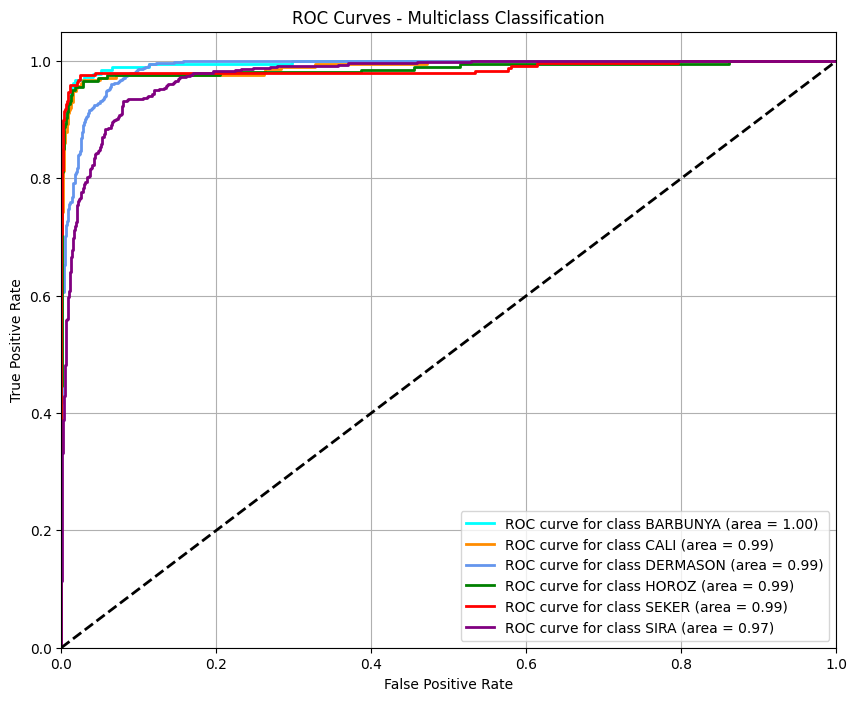

In [66]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'gold'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multiclass Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### 5.1.2 Optimized SVM model evaluation

In [67]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred2))

SVM Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.76      0.96      0.85       187
        CALI       0.97      0.79      0.87       214
    DERMASON       0.93      0.88      0.91       689
       HOROZ       0.90      0.92      0.91       206
       SEKER       0.88      0.95      0.92       247
        SIRA       0.83      0.84      0.84       510

    accuracy                           0.88      2053
   macro avg       0.88      0.89      0.88      2053
weighted avg       0.89      0.88      0.88      2053



In [68]:
conf_matrix = confusion_matrix(y_test, svm_pred2)

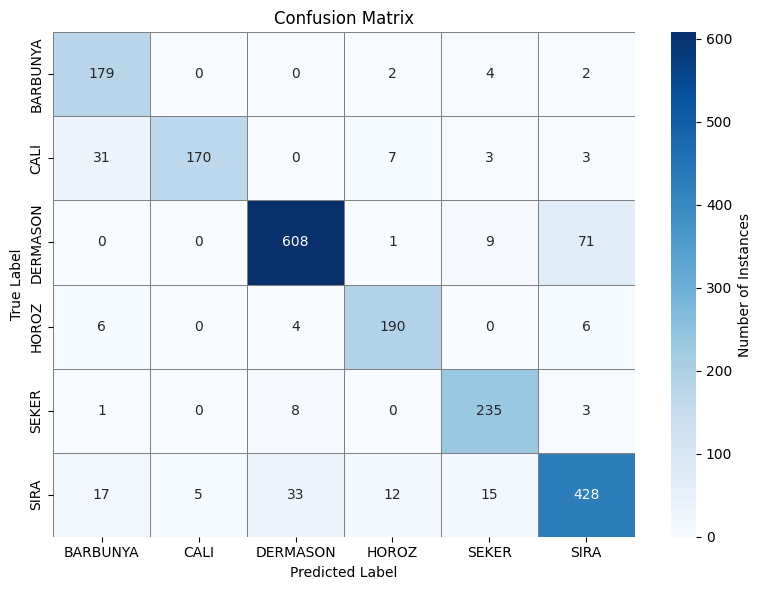

In [69]:
plot_confusion_matrix(conf_matrix, class_labels)

### 5.2 Decision tree evaluation

#### 5.2.1 Initial decision tree model evaluation

In [70]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_pred1))


Decision Tree Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.65      0.75       187
        CALI       0.75      0.92      0.82       214
    DERMASON       0.93      0.85      0.89       689
       HOROZ       0.94      0.86      0.90       206
       SEKER       0.90      0.93      0.91       247
        SIRA       0.78      0.88      0.83       510

    accuracy                           0.86      2053
   macro avg       0.86      0.85      0.85      2053
weighted avg       0.87      0.86      0.86      2053



In [71]:
conf_matrix = confusion_matrix(y_test, tree_pred1)

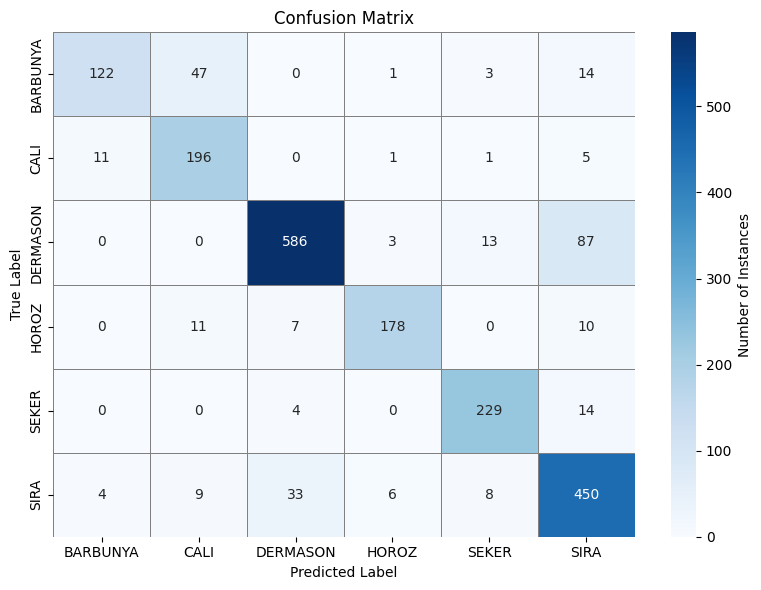

In [72]:
plot_confusion_matrix(conf_matrix, class_labels)

In [73]:
ovr_tree1 = OneVsRestClassifier(tree_model1)
ovr_tree1.fit(X_train, y_train_bin)

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                     random_state=42))

In [75]:
tree_probs3 = ovr_tree1.predict_proba(X_test)

In [77]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], tree_probs3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

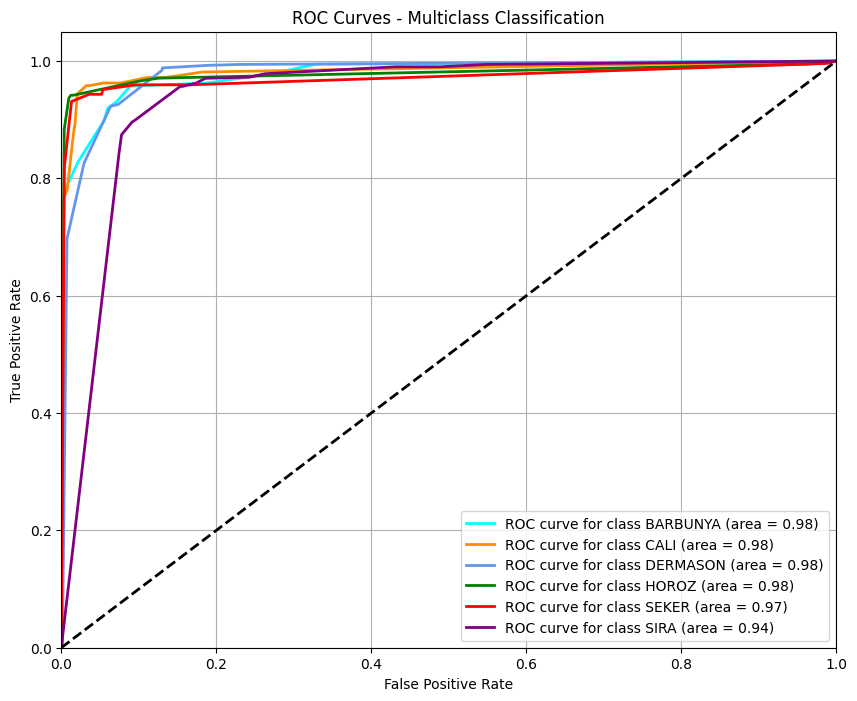

In [78]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'gold'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multiclass Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### 5.2.2 Optimized decision tree model evaluation

In [79]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_pred2))


Decision Tree Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       187
        CALI       0.91      0.91      0.91       214
    DERMASON       0.90      0.90      0.90       689
       HOROZ       0.92      0.91      0.91       206
       SEKER       0.89      0.92      0.90       247
        SIRA       0.84      0.83      0.83       510

    accuracy                           0.89      2053
   macro avg       0.89      0.89      0.89      2053
weighted avg       0.89      0.89      0.89      2053



In [80]:
conf_matrix = confusion_matrix(y_test, tree_pred2)

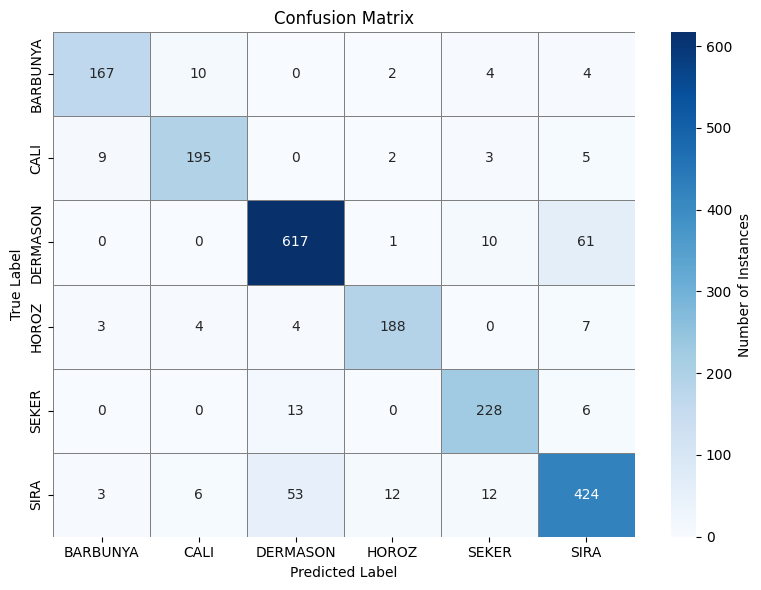

In [81]:
plot_confusion_matrix(conf_matrix, class_labels)

In [82]:
ovr_tree2 = OneVsRestClassifier(tree_model2)
ovr_tree2.fit(X_train, y_train_bin)

OneVsRestClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     random_state=42))

In [83]:
tree_probs4 = ovr_tree2.predict_proba(X_test)

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], tree_probs4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

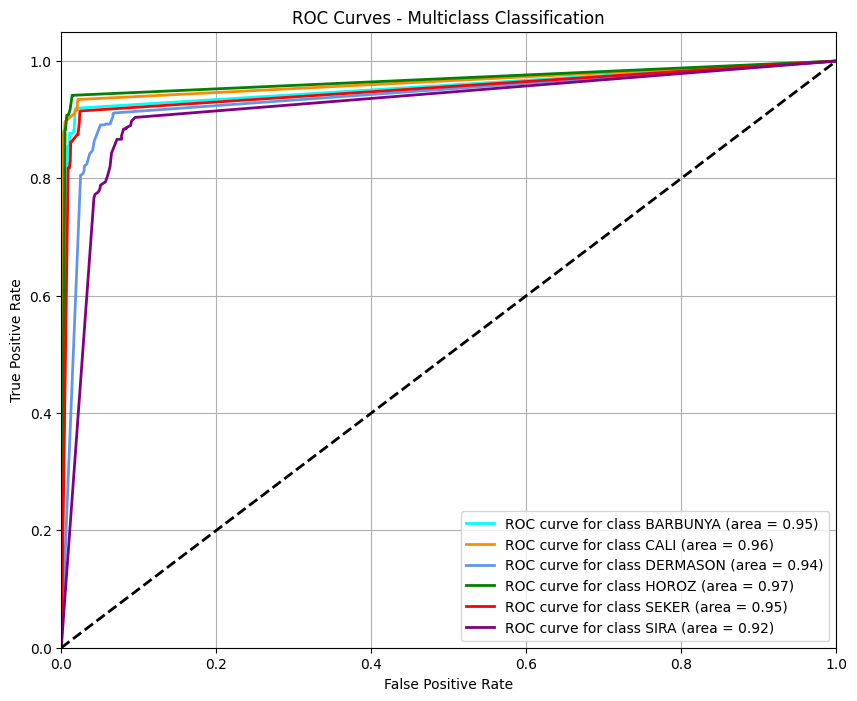

In [85]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'gold'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multiclass Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 6.0 Deployment

Paper: ComfortJDDS8536-1 - Decision Tree and Support Vector Machine Classification of Dry Bean Varieties